<a href="https://www.kaggle.com/code/vijayadithyabk/auto-mpg-dataset-eda?scriptVersionId=211259530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Dataset Description 
The MPG dataset is technical spec of cars originaly provided from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg). The data concerns city-cycle fuel consumption in miles per gallon to be analyzed in terms of 3 multivalued discrete and 5 continuous attributes.
___

## Columns Description
1. `mpg`: miles per galon of fuel (continuous variable).
2. `cylinders`: number of engine cylinders (multi-valued discrete variable).
3. `displacement`: (continuous variable)
4. `horsepower`: the power produced by engine to move the car (continuous variable)
5. `weight`: car weight (continuous variable)
6. `acceleration`: the acceleration an engine can get per second (continuous variable)
7. `model year`: car release year from 1970 to 1982(multi-valued discrete variable)
8. `origin`: car manufacturing place (1 -> USA, 2 -> Europe, 3 -> Asia) (multi-valued discrete variable)
9. `car name`: car model name (unique for each instance)

## Environment Set-Up

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

___
## Data Wrangling 
We'd load our desired data from the flat csv file `auto-mpg.csv` to a dataframe using `pandas`, and display its first 5 records. here, we want to check for:
- Missingness in our dataframe.
- Inconsistent data types.
- Duplicated rows.
- columns to be droped or re-parsed.

In [2]:
# load the dataset
mpg_filepath = "../input/autompg-dataset/auto-mpg.csv"
mpg_df = pd.read_csv(mpg_filepath)

In [3]:
# check a sample of the imported dataset
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
# check for duplicated rows
mpg_df.duplicated().sum()

0

`horsepower` column has `object` data type instead of `int`.

In [6]:
# checking columns for unique values
mpg_df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [7]:
# list unique values of horsepower
mpg_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
(mpg_df['horsepower'] == '?').sum()

6

Horsepower column has `6` values containing `?`, thus making the horsepower to have the `object` datatype instead of `int`.

### **Exploring Summary**
- Our dataset has a total of 398 records and 9 columns.
- We have no NaNs in our dataset nor duplicated rows.
- `horsepower` column has inconsistant data type. It needs to be handled and casted to `int` data type.
- `origin` would need to be parsed and casted into a categorical datatype.
- No columns would need to be dropped.

## Data Cleaning
Here, we will be performing cleaning operations like dropping rows, mapping columns, converting data types.

### **Cleaning `horsepower` column**
We will drop each row that contains a `?` on the `horsepower` column.

In [9]:
# drop '?' vlaues
mpg_df = mpg_df[mpg_df.horsepower != '?']

# confirm changes
(mpg_df.horsepower == '?').sum()

0

In [10]:
# casting horsepower into integer datatype
mpg_df.horsepower = mpg_df.horsepower.astype(int)

# confirm changes
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


### **Handling `origin` column**
We will map the `origin` column to the provided description (1-> USA, 2-> Europe, 3-> Asia), and cast its datatype as `category`.

In [11]:
# parse origin column
mpg_df.loc[mpg_df.origin == 1, 'origin'] = 'USA'
mpg_df.loc[mpg_df.origin == 2, 'origin'] = 'Europe'
mpg_df.loc[mpg_df.origin == 3, 'origin'] = 'Asia'

# cast the origin column into category
mpg_df['origin'] = mpg_df['origin'].astype('category')

# confirm changes
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    int64   
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model year    392 non-null    int64   
 7   origin        392 non-null    category
 8   car name      392 non-null    object  
dtypes: category(1), float64(3), int64(4), object(1)
memory usage: 28.1+ KB


/tmp/ipykernel_17/1953608924.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'USA' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mpg_df.loc[mpg_df.origin == 1, 'origin'] = 'USA'


Now the data has been cleaned and we can proceed to visualize the data to obtain meaningful insights.

## Data Visualization
In this section, we'd use some informative visuals to help us draw insights and conclusions about our data and also help us in our EDA.

Statistics summary of the cleaned data.

In [12]:
# display statistics summary
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


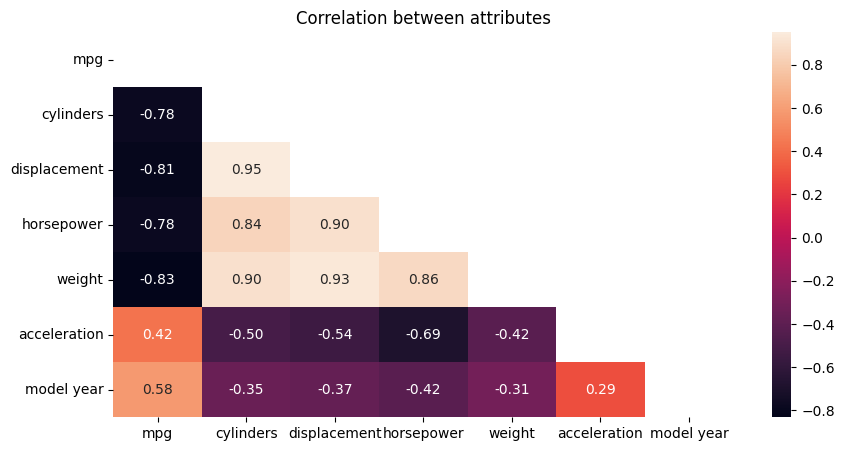

In [13]:
# plotting correlation heatmap
plt.figure(figsize=(10,5))
numeric_df = mpg_df.select_dtypes(include=['number'])
corr = numeric_df.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot = True, mask = mask, fmt = '.2f')
plt.title("Correlation between attributes")
plt.show()

Taking a closer look into the `model year` distribution

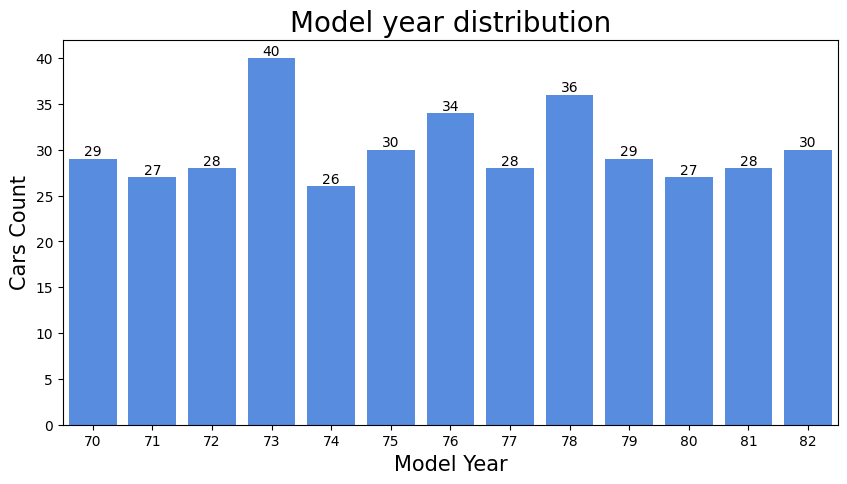

In [14]:
# display the histogram of the `model year` column
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'model year', data = mpg_df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("Model year distribution", fontsize = 20)
plt.xlabel("Model Year", fontsize = 15)
plt.ylabel("Cars Count", fontsize = 15)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Model year against MPG'}, xlabel='Model Year', ylabel='MPG'>

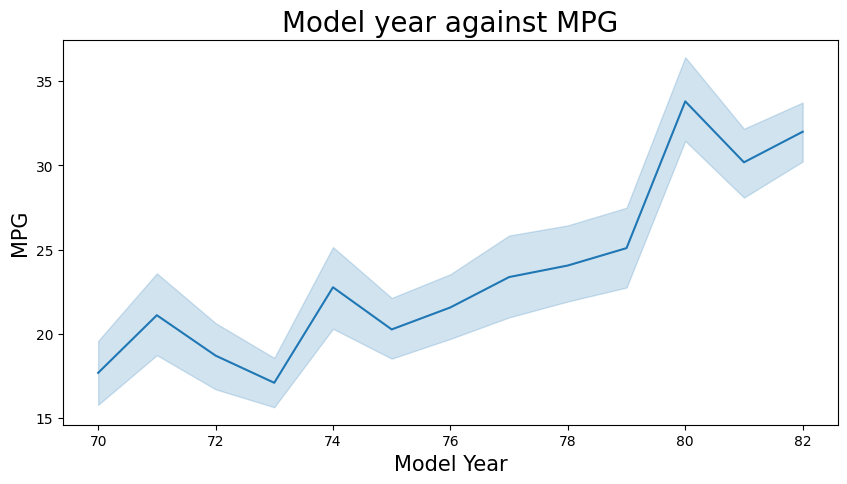

In [15]:
# plot model year against mpg
plt.figure(figsize=(10,5))
plt.title("Model year against MPG", fontsize = 20)
plt.xlabel("Model Year", fontsize = 15)
plt.ylabel("MPG", fontsize = 15)
sns.lineplot(x = 'model year', y = 'mpg', data = mpg_df)

From the above visualizations, we make the following observations:
- Our dataset contains info about cars from 1970 to 1982.
- Most of the cars are produced in `1973`.
- As years pass after `1973`, there has been a noticable increase in `mpg`.

Now, let's take a closer look at `mpg` column

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


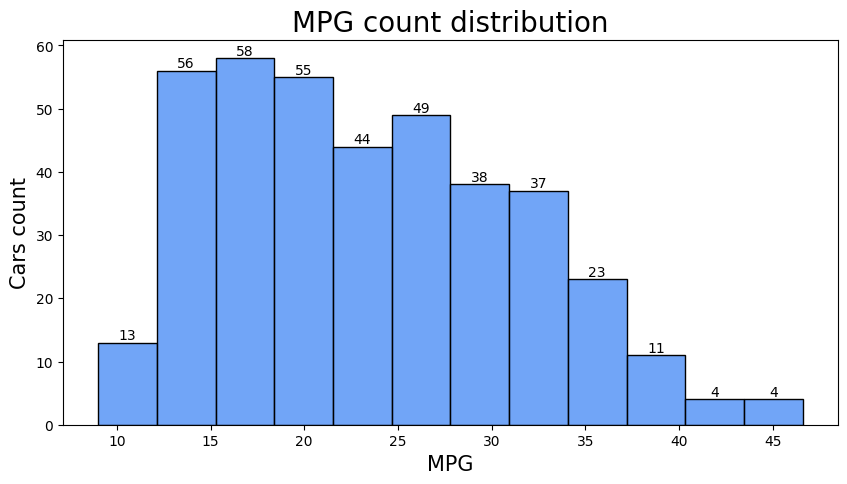

In [16]:
# plot mpg count distibution
plt.figure(figsize=(10,5))
ax = sns.histplot(x = 'mpg', data = mpg_df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type = 'edge')
plt.title("MPG count distribution", fontsize = 20)
plt.xlabel("MPG", fontsize = 15)
plt.ylabel("Cars count", fontsize = 15)
plt.show()

Most of the cars in our dataset have mpg between 15 to 20. Our data is also skewed to the right.

Further, we will compare these findings to `cylinders` and `horsepower` columns.

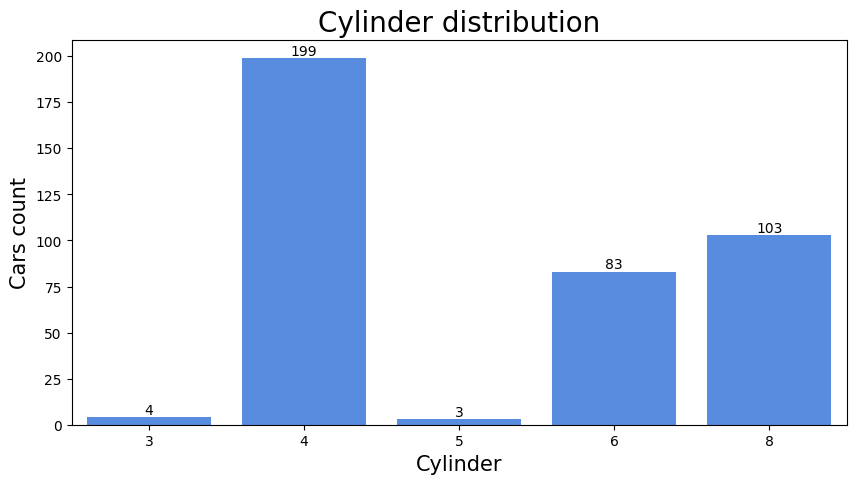

In [17]:
# display cylinder column distribution
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'cylinders', data = mpg_df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type = 'edge')
plt.title("Cylinder distribution", fontsize = 20)
plt.xlabel("Cylinder", fontsize = 15)
plt.ylabel("Cars count", fontsize = 15)
plt.show()

Majority cars have `4` cylinder engines.

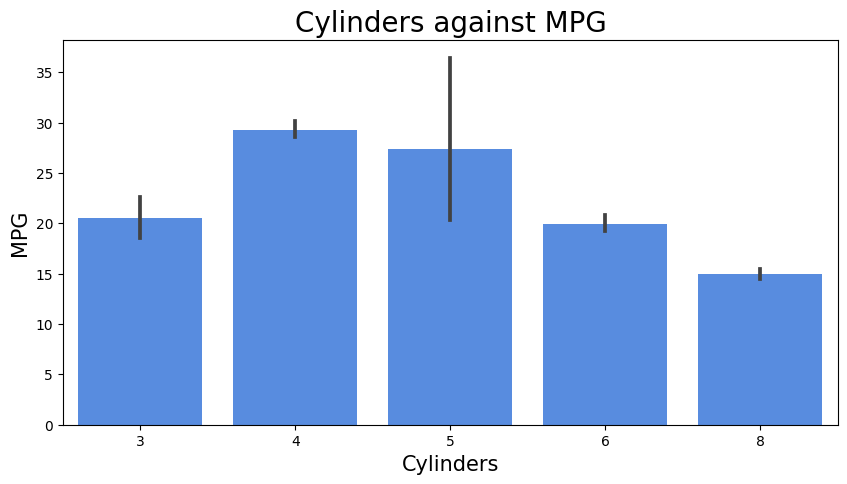

In [18]:
# plot cylinders against mpg
plt.figure(figsize=(10,5))
sns.barplot(x = 'cylinders', y = 'mpg', data = mpg_df, color = '#4287f5')
plt.title("Cylinders against MPG", fontsize = 20)
plt.xlabel("Cylinders", fontsize = 15)
plt.ylabel('MPG', fontsize = 15)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


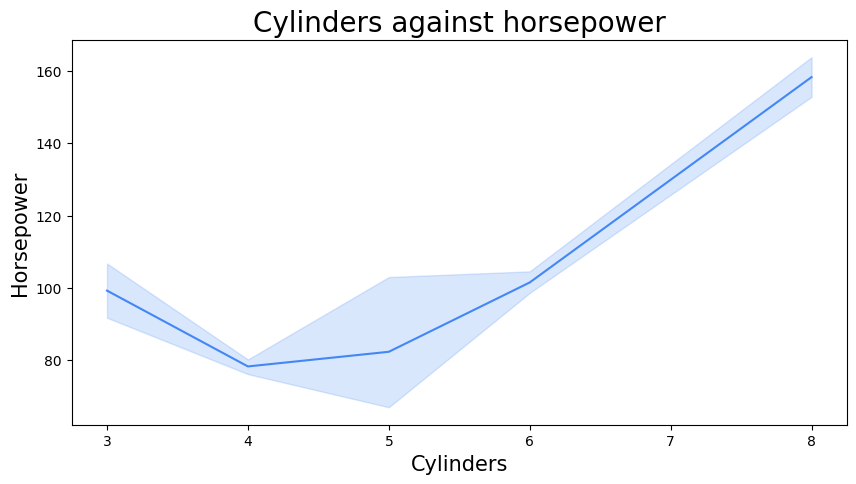

In [19]:
# plot cylinders against horsepower
plt.figure(figsize=(10,5))
sns.lineplot(x = 'cylinders', y = 'horsepower', data = mpg_df, color = '#4387f5')
plt.title("Cylinders against horsepower", fontsize = 20)
plt.xlabel("Cylinders", fontsize = 15)
plt.ylabel("Horsepower", fontsize = 15)
plt.show()

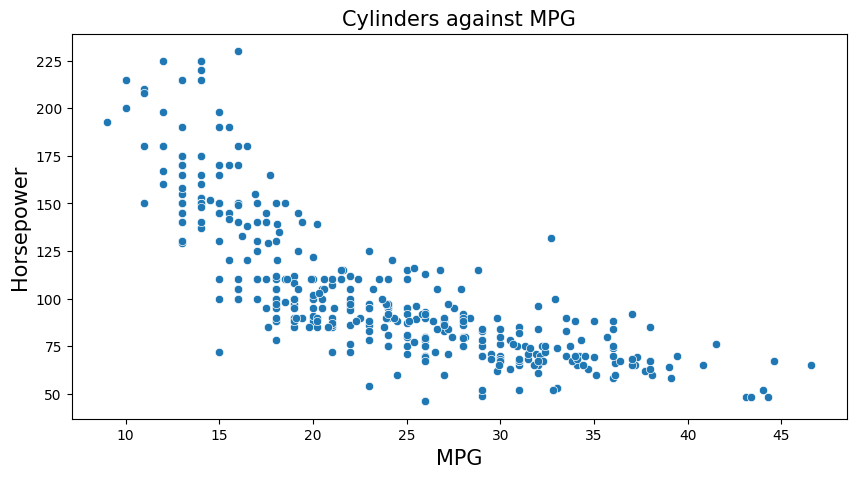

In [20]:
# plot mpg against horsepower
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'mpg', y = 'horsepower', data = mpg_df)
plt.title("Cylinders against MPG", fontsize = 15)
plt.xlabel("MPG", fontsize = 15)
plt.ylabel("Horsepower", fontsize = 15)
plt.show()

From the above visuals, we can notice that:
- As `cylinders` in the engine increases above 4, `MPG` decreases.
- As `cylinders` in the engine increases above 4, engine `horsepower` increases.
- there is negative correlation between `mpg` and `horsepower`.

Next, we'll move into exploring `origin` column and find insights about each manufacturing country.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


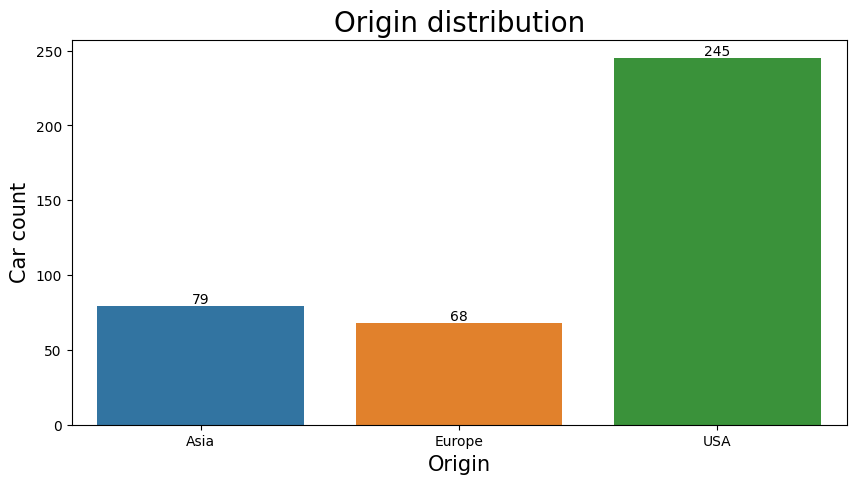

In [21]:
# plot cars origin distribution
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'origin', data = mpg_df)
ax.bar_label(ax.containers[0], label_type = 'edge')
plt.title("Origin distribution", fontsize = 20)
plt.xlabel("Origin", fontsize = 15)
plt.ylabel("Car count", fontsize = 15)
plt.show()

We can see that `USA` alone produces more than 64% of the total cars in our dataset.

Let's explore its relations between other columns.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


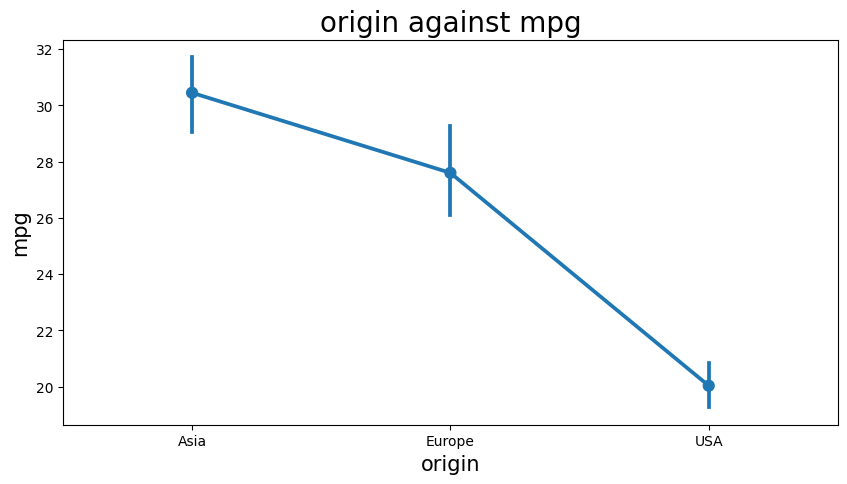

In [22]:
# ploting origin anainst mpg
plt.figure(figsize=(10,5))
sns.pointplot(x = 'origin', y = 'mpg', data = mpg_df)
plt.title("origin against mpg", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

Althogh `USA` has the biggest count of our dataset, it produces cars with relatively very low `mpg` compared to `Asia` and `Europe`
`Asia` is the leading contry in producing cars with high `mpg` with a mean close to 30.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


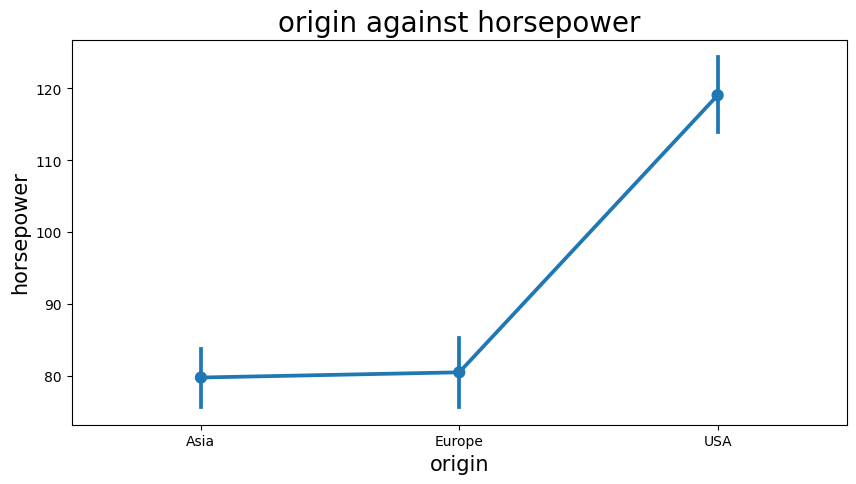

In [23]:
# ploting origin anainst horsepower
plt.figure(figsize=(10,5))
sns.pointplot(x = 'origin', y = 'horsepower', data = mpg_df)
plt.title("origin against horsepower", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

As expected, `USA` has the highest engine `horsepower`. This implies the previously observed conclusion that `hoursepower` and `mpg` has a negative correlation.

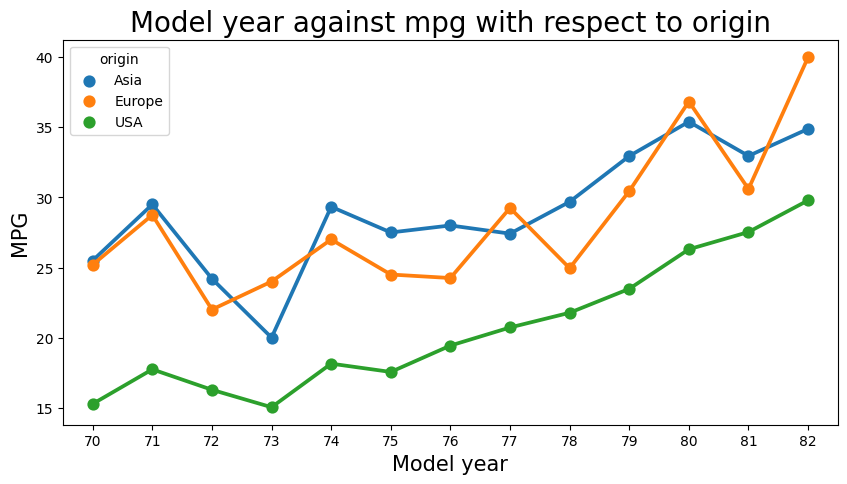

In [24]:
# display model year against mpg with respect to origin
plt.figure(figsize=(10,5))
sns.pointplot(x = 'model year', y = 'mpg', hue = 'origin', data = mpg_df, errorbar=None);
plt.title("Model year against mpg with respect to origin", fontsize = 20)
plt.xlabel("Model year", fontsize = 15)
plt.ylabel("MPG", fontsize = 15)
plt.show()

This chart also implies the positive correlation between `model year` and `mpg`, and shows that `Asia` has been leading country in this industry, followed by `Europe` and `USA` comes in the last place.

Let's now explore how `weight` has been affecting our car specs over the years.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


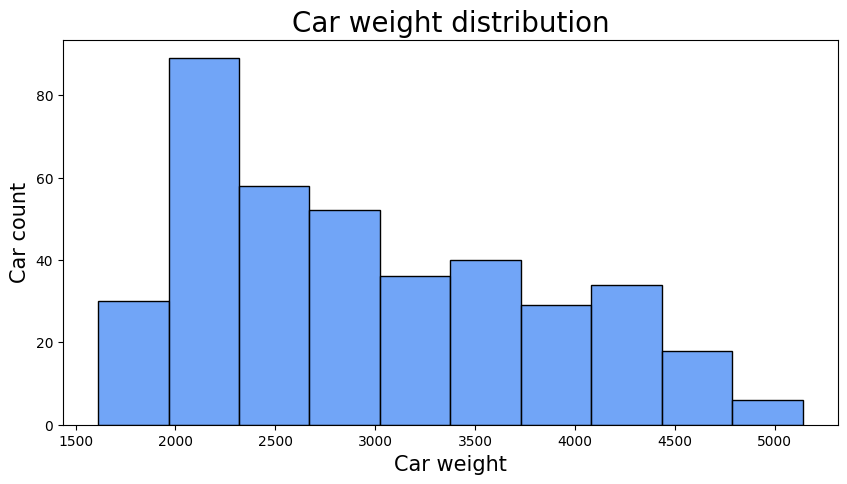

In [25]:
# plot car weight distribution
plt.figure(figsize=(10,5))
sns.histplot(x='weight', data=mpg_df, color='#4287f5')
plt.title("Car weight distribution", fontsize=20)
plt.xlabel("Car weight", fontsize=15)
plt.ylabel("Car count", fontsize=15)
plt.show()

Car `weight` varies from 1500 to 5000, with the majority of cars at 2000.

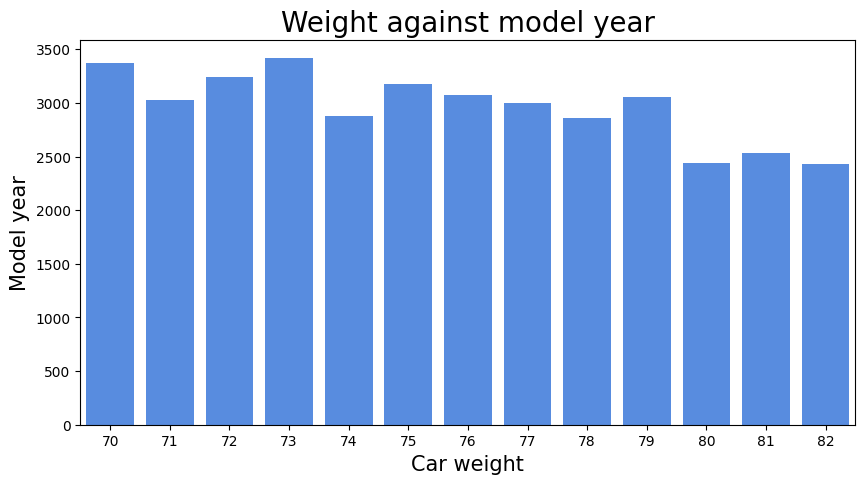

In [26]:
# plot weight against model year
plt.figure(figsize=(10,5))
ax = sns.barplot(x='model year', y='weight', data=mpg_df, color='#4287f5', errorbar=None)
plt.title("Weight against model year", fontsize=20)
plt.xlabel("Car weight", fontsize=15)
plt.ylabel("Model year", fontsize=15)
plt.show()

Car `weight` has been decreasing over the years. 

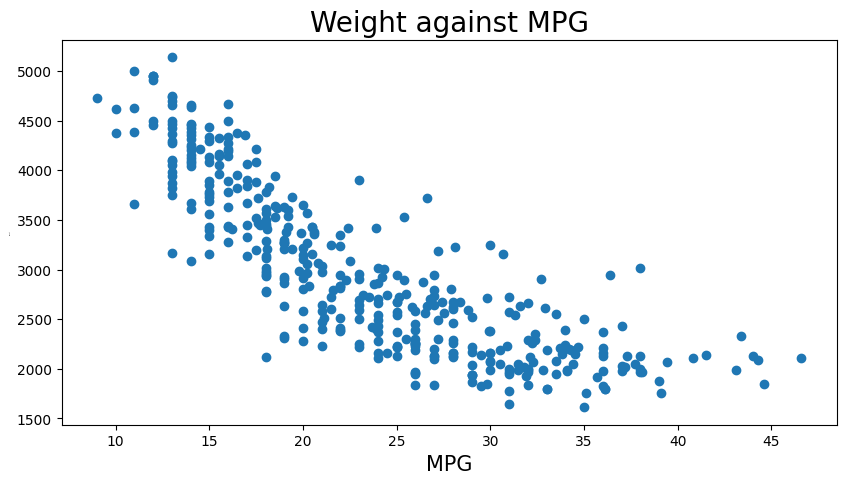

In [27]:
# plot weight against mpg
plt.figure(figsize=(10,5))
plt.scatter(x='mpg', y='weight', data=mpg_df)
plt.title("Weight against MPG", fontsize=20)
plt.xlabel("MPG", fontsize=15)
plt.ylabel("Weight", fontsize=1)
plt.show()

`mpg` inceases as `weight` decreses over time, that indecates a stron correlation between them.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


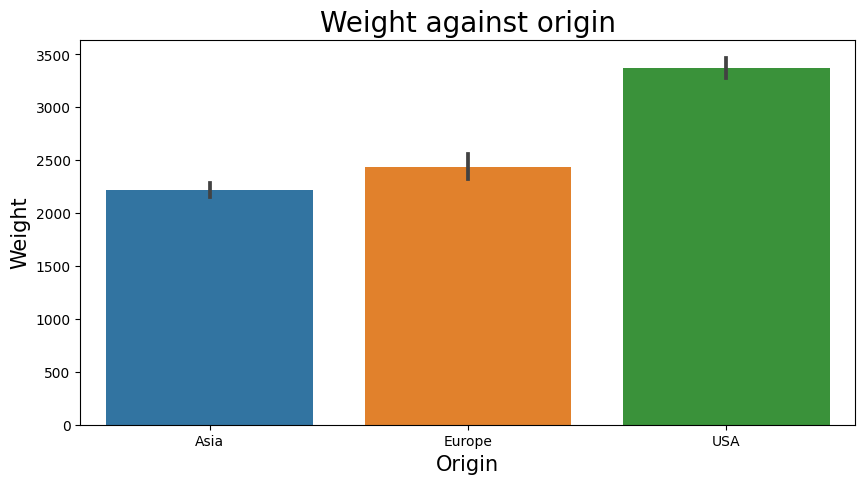

In [28]:
# plot weight against origin
plt.figure(figsize=(10,5))
sns.barplot(x='origin', y='weight', data=mpg_df)
plt.title("Weight against origin", fontsize=20)
plt.xlabel("Origin", fontsize=15)
plt.ylabel("Weight", fontsize=15)
plt.show()

As expected, `USA` gets the highest possible `weight` values, that explains alot about its low `mpg` and high `horsepower`.
`Asia` produces the lightest cars campared to `USA` and `Europe`, this also explains itss high `mpg` and low `horsepower`.

Let's take a final look at acceleration column, and how it is related to horsepower and mpg to get a better understanding of our findings.

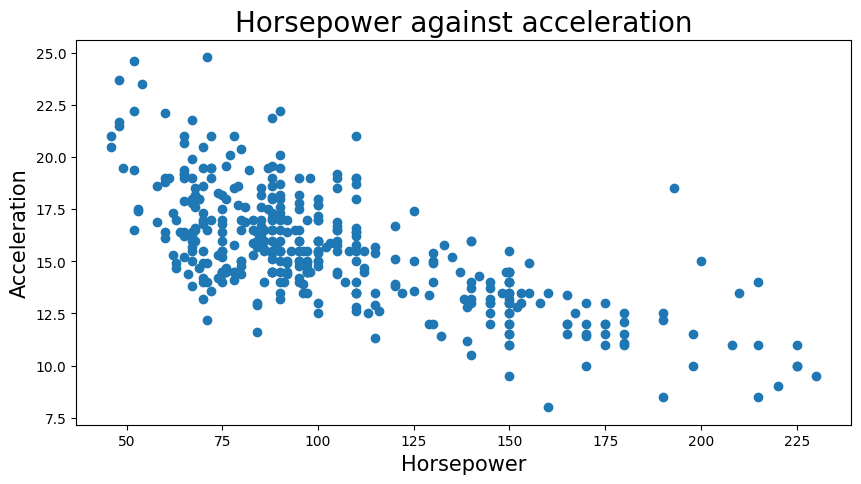

In [29]:
# plot horsepower  against acceleration
plt.figure(figsize=(10,5))
plt.scatter(x='horsepower', y='acceleration', data=mpg_df)
plt.title("Horsepower against acceleration", fontsize=20)
plt.xlabel("Horsepower", fontsize=15)
plt.ylabel("Acceleration", fontsize=15)
plt.show()

Wa can spot a negative correlation between acceleration and horepower, this means that it has a positive one with mpg

## Conclusion

Based on the visualizations, we have drawn the following insights:

1. There has been a noticeable increase` in` MPG (miles per gallon) for cars manufactured af`ter `1973.
2. As the number of en`gine cyli`nders increases be4 f`our`, MPG decreases while en`gine horse`power increases, indicating a negative correlation bet`wee`n MPG` and horse`power.
3. Over `tim`e, MPG has shown a strong positive correlation with decreasing ve`hicle `weight.
4. Althou`gh `the USA leads in car production, its cars have relative`ly `low MPG and the highest a`verage` weight compared to thos`e fr`om As`ia and` Euro`pe.`
5. Asia produces the lightest cars with the `hig`hest MPG, averaging clos`e t`o 30 MPG, making it the leader in fuel-efficient vehicles.
6. A negative correlation exists` between acc`elera`tion and h`orsepower, suggesting a positive correlation` between acc`elera`tio`n and MPG.e one with `mpg`.